In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import sys
sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/ADAPT-VQE/')
print(sys.executable)

/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


In [36]:
from src.pools import QE
from src.molecules import create_h2, create_h4

from algorithms.s_adapt_vqe import AdaptVQE

r = 0.742
molecule = create_h4(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=30,
                    max_opt_iter=100,
                    verbose=True
                    )

# print(pool)
adapt_vqe.run()

HF State: [1, 1, 1, 1, 0, 0, 0, 0]
N Qubits: 8
Hamiltonian Type: <class 'openfermion.ops.representations.interaction_operator.InteractionOperator'>
Hamiltonian: () 3.0904329478706196
((0, 1), (0, 0)) -2.1953017461182602
((0, 1), (4, 0)) 0.19550503790211243
((1, 1), (1, 0)) -2.1953017461182602
((1, 1), (5, 0)) 0.19550503790211243
((2, 1), (2, 0)) -1.7812952095588994
((2, 1), (6, 0)) 0.16464123372039435
((3, 1), (3, 0)) -1.7812952095588994
((3, 1), (7, 0)) 0.16464123372039435
((4, 1), (0, 0)) 0.19550503790211257
((4, 1), (4, 0)) -1.3139016630550018
((5, 1), (1, 0)) 0.19550503790211257
((5, 1), (5, 0)) -1.3139016630550018
((6, 1), (2, 0)) 0.16464123372039421
((6, 1), (6, 0)) -0.6100499034540418
((7, 1), (3, 0)) 0.16464123372039421
((7, 1), (7, 0)) -0.6100499034540418
((0, 1), (0, 1), (0, 0), (0, 0)) 0.2842088967585272
((0, 1), (0, 1), (0, 0), (4, 0)) -0.04699325841413298
((0, 1), (0, 1), (2, 0), (2, 0)) 0.07746525355095416
((0, 1), (0, 1), (2, 0), (6, 0)) -0.02424934059015552
((0, 1), (0,

Initial Energy -2.0990304444532315
Jumlah Iterasi ADAPT-VQE: 9
-2.115913006017223
-2.0990304444532315


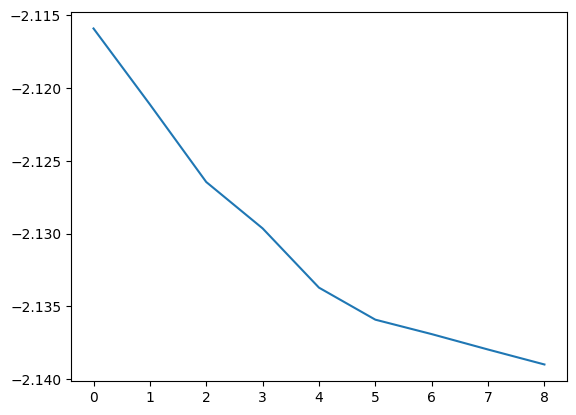

In [39]:
import matplotlib.pyplot as plt

data = adapt_vqe.data
print("Initial Energy", data.initial_energy)

print("Jumlah Iterasi ADAPT-VQE:", data.iteration_counter)

print(data.evolution.its_data[0].energy)
print(data.evolution.initial_energy)
plt.plot(data.evolution.energies)